# Alpha pick's announcement effect

Each time AP announced the pick, there will be a big intraday bump (5%+). How much does this contributed to its total performance? Is AP just a self-fulfilling prophecy by its subscribers?

It turns out if we evaluate the AP portfolio with the open price for buy, the performance only degenerated by **0.4%**. The impact is negligible.

In [2]:
from datetime import datetime

from research.trade_sim import Backtest
from research.random_transactions import RandomTransactionGenerator
from research.compare_random_portfolios import compare_with_many

%autoreload 2


Processing trades:   0%|          | 0/83 [00:00<?, ?it/s]2024-12-18 11:49:16 - trade_sim.py:52 - WARNING - After execution portfolio value calculation used previous day price for NUE, used 2023-01-13 instead of 2023-01-16
2024-12-18 11:49:16 - trade_sim.py:52 - WARNING - After execution portfolio value calculation used previous day price for AMR, used 2023-01-13 instead of 2023-01-16
2024-12-18 11:49:16 - trade_sim.py:52 - WARNING - After execution portfolio value calculation used previous day price for COP, used 2023-01-13 instead of 2023-01-16
2024-12-18 11:49:16 - trade_sim.py:52 - WARNING - After execution portfolio value calculation used previous day price for ARCH, used 2023-01-13 instead of 2023-01-16
2024-12-18 11:49:16 - trade_sim.py:52 - WARNING - After execution portfolio value calculation used previous day price for VLO, used 2023-01-13 instead of 2023-01-16
2024-12-18 11:49:16 - trade_sim.py:52 - WARNING - After execution portfolio value calculation used previous day price

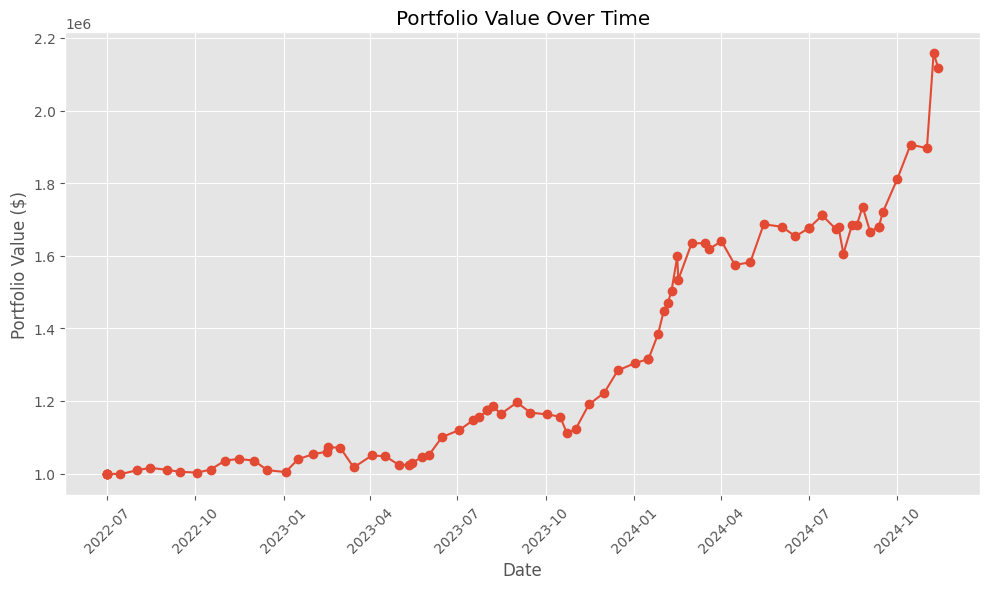

graph plotted


In [3]:
ap_ops = Backtest.read_trading_ops('../ap_ops.csv')
bt = Backtest()
open_buy_ending_value = bt.run(ap_ops, datetime.strptime('2024-11-13', '%Y-%m-%d').date(), use_open_price_for_buy=True, plot=False)
closed_buy_ending_value = bt.run(ap_ops, datetime.strptime('2024-11-13', '%Y-%m-%d').date(), use_open_price_for_buy=False, plot=True)

In [4]:
open_buy_ending_value / closed_buy_ending_value

1.0041070340851672

# How much is AP's success due to luck?

## Compared to buy up momentum and sell on fall

The alternative strategy is to randomly choose a stock that has grow at least 

In [5]:
r = RandomTransactionGenerator('../ap_ops.csv')
rand_port = r.generate_operations(100)

2024-12-18 11:49:30 - random_transactions.py:66 - INFO - Found 7 symbol candidates 2022-07-01
2024-12-18 11:49:30 - random_transactions.py:66 - INFO - Found 7 symbol candidates 2022-07-01
2024-12-18 11:49:30 - random_transactions.py:66 - INFO - Found 7 symbol candidates 2022-07-01
2024-12-18 11:49:30 - random_transactions.py:66 - INFO - Found 7 symbol candidates 2022-07-01
2024-12-18 11:49:30 - random_transactions.py:66 - INFO - Found 7 symbol candidates 2022-07-01
2024-12-18 11:49:31 - random_transactions.py:66 - INFO - Found 8 symbol candidates 2022-07-15
2024-12-18 11:49:32 - random_transactions.py:66 - INFO - Found 30 symbol candidates 2022-08-01
2024-12-18 11:49:33 - random_transactions.py:66 - INFO - Found 37 symbol candidates 2022-08-15
2024-12-18 11:49:34 - random_transactions.py:66 - INFO - Found 18 symbol candidates 2022-09-01
2024-12-18 11:49:34 - random_transactions.py:66 - INFO - Found 26 symbol candidates 2022-09-15
2024-12-18 11:49:35 - random_transactions.py:66 - INFO -

In [10]:
benchmarks = {
    'spx': r.buy_single('^SPX'),
    'alpha pick': r.original_transactions(),
    'ABNB': r.buy_single('ABNB'),
}

Processing trades:   0%|          | 0/61 [00:00<?, ?it/s]2024-12-18 11:53:43 - trade_sim.py:52 - WARNING - After execution portfolio value calculation used previous day price for ^SPX, used 2023-01-13 instead of 2023-01-16
2024-12-18 11:53:43 - trade_sim.py:105 - WARNING - Buying used next day price for ^SPX, used 2023-01-13 instead of 2023-01-16
2024-12-18 11:53:43 - trade_sim.py:115 - INFO - Added $18950.700278599954 funds to invest 2.0% of portfolio ($25930.59)
2024-12-18 11:53:43 - trade_sim.py:115 - INFO - Added $22043.938299172 funds to invest 2.0% of portfolio ($25449.64)


2024-12-18 11:53:43 - trade_sim.py:115 - INFO - Added $22685.199275583436 funds to invest 2.0% of portfolio ($26348.12)
2024-12-18 11:53:43 - trade_sim.py:115 - INFO - Added $22557.70687271167 funds to invest 2.0% of portfolio ($26732.95)
2024-12-18 11:53:43 - trade_sim.py:115 - INFO - Added $23077.257191454235 funds to invest 2.0% of portfolio ($27694.48)
2024-12-18 11:53:43 - trade_sim.py:115 - INFO - Added $23370.692100629083 funds to invest 2.0% of portfolio ($28532.82)
2024-12-18 11:53:43 - trade_sim.py:115 - INFO - Added $23841.35327821258 funds to invest 2.0% of portfolio ($29539.17)
2024-12-18 11:53:43 - trade_sim.py:115 - INFO - Added $29106.99247036425 funds to invest 2.0% of portfolio ($29569.86)
Processing trades: 100%|██████████| 61/61 [00:00<00:00, 5528.00it/s]
2024-12-18 11:53:43 - trade_sim.py:148 - INFO - Calculating final portfolio value
Processing trades:   0%|          | 0/83 [00:00<?, ?it/s]2024-12-18 11:53:43 - trade_sim.py:52 - WARNING - After execution portfolio

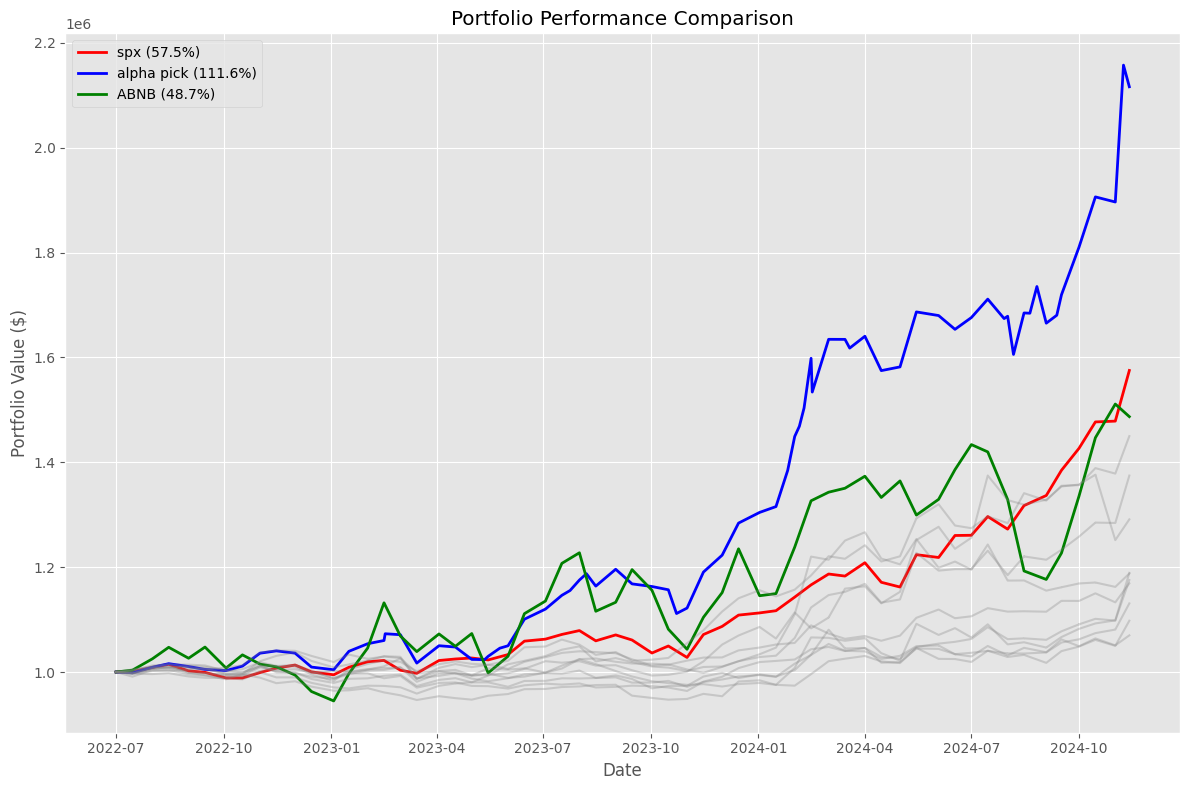


Results Summary:
Comparison Portfolios Mean Return: 21.36%
Comparison Portfolios Std Dev: 11.55%
Comparison Portfolios Min Return: 6.99%
Comparison Portfolios Max Return: 44.99%
Comparison Portfolios 1% Percentile: 7.24%
Comparison Portfolios 5% Percentile: 8.25%
Comparison Portfolios 10% Percentile: 9.50%
Comparison Portfolios 25% Percentile: 14.04%
Comparison Portfolios 50% Percentile: 18.16%
Comparison Portfolios 75% Percentile: 26.56%
Comparison Portfolios 90% Percentile: 38.22%
Comparison Portfolios 99% Percentile: 44.31%


array([16.90031139, 18.91335291,  9.78186584,  6.98932656, 18.78218241,
       17.54114898, 44.9891846 , 13.08387097, 29.11473266, 37.46326755])

In [11]:

compare_with_many(rand_port[:10], 1000000, benchmarks=benchmarks, end_day='2024-11-13')

In [39]:
del compare_with_many